# What Loans should be Approved or Declined
## by Ovie Iboyitie


## Investigation Overview

Of 113,937 loan listings, 49.65% are current, 33.42% of the loans are completed, 10.53% and 4.40% are chargedoff and defaulted respectively with 1.81% percent past due with less than 0.2% accounting for Cancelled and Final Payment in progress listings. Giving out loans could be for a lot of different reasons - improving the socioeconomic life of the borrower, saving the life of the borrower, imporiving the economy of a state by funding business and investments, but sometimes, or rather most of the times, its to make profit and/or a combo of making profits and other reasons.



## Dataset Overview

This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_csv("prosperLoanData.csv")
df.head(2)

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.158,0.138,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.092,0.082,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1


## Count of Loan Status

Of 113,937 loan listings, Majority(49.65%) of the loans are current, 33.42% of the loans are completed, 10.53% and 4.40% are chargedoff and defaulted respectively with 1.81% percent Past due

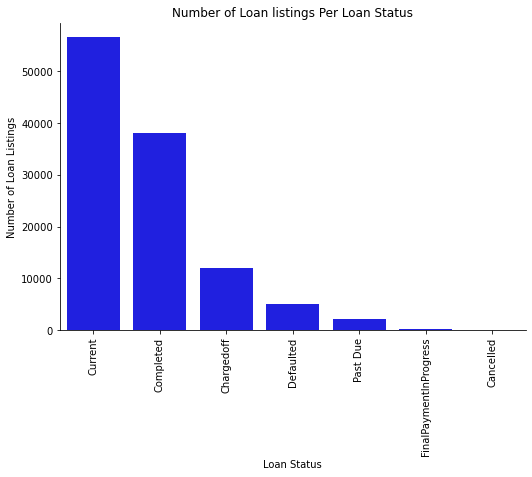

<Figure size 432x288 with 0 Axes>

In [3]:
# Creating a dictionary that maps past due loans irrespective of the number of days, into "Past Due"
past_due = {"Current"  : "Current",
"Completed": "Completed",    
"Chargedoff": "Chargedoff",
"Defaulted": "Defaulted",
"Past Due (1-15 days)": "Past Due",
"Past Due (31-60 days)": "Past Due",
"Past Due (61-90 days)"  :"Past Due",
"Past Due (91-120 days)":  "Past Due",
"Past Due (16-30 days)": "Past Due",
"FinalPaymentInProgress":"FinalPaymentInProgress", 
"Past Due (>120 days)":"Past Due",
"Cancelled":"Cancelled"}

# Changing all past due loans irrespective of the number of days, into "Past Due"
df.LoanStatus = df.LoanStatus.map(past_due)

# making a plot of the Loan status and the number of times they occur
sns.catplot(data = df, x="LoanStatus",kind="count", color ="blue",aspect = 1.5, order=list(df["LoanStatus"].value_counts().index))
plt.title("Number of Loan listings Per Loan Status")
plt.xlabel("Loan Status")
plt.ylabel("Number of Loan Listings")
plt.xticks(rotation=90)
plt.show()
plt.clf()

## Count of Loan Status

14.89% of the loans that had a listing category of "Not Avialable", a whooping 51.18% of the loans were listed for Debt Consolidation, 6.53% and 6.31% were listed as Home improvement and business respectively. 
The top 10 listings excluding the "Not available" category are
- Debt Consolidation
- Other
- Home Improvement    
- Business              
- Auto                   
- Personal Loan          
- Household Expenses     
- Medical/Dental         
- Taxes                 
- Large Purchases         

They account for 81.44% of the listed loans

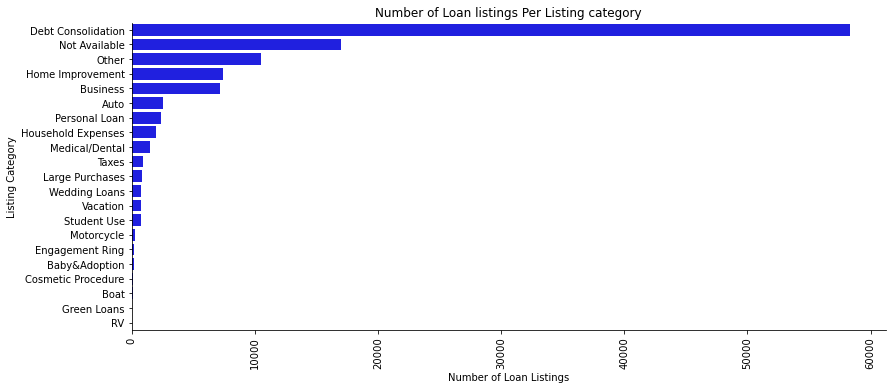

<Figure size 432x288 with 0 Axes>

In [4]:
ListingCategory = {0 : "Not Available",
                   1 : "Debt Consolidation", 
                   2 : "Home Improvement", 
                   3 : "Business", 
                   4 : "Personal Loan", 
                   5 : "Student Use", 
                   6 : "Auto", 
                   7 : "Other",
                   8 : "Baby&Adoption", 
                   9 : "Boat", 
                   10 : "Cosmetic Procedure",
                   11 : "Engagement Ring",
                   12 : "Green Loans", 
                   13 : "Household Expenses", 
                   14 : "Large Purchases", 
                   15 : "Medical/Dental", 
                   16 : "Motorcycle", 
                   17 : "RV", 
                   18 : "Taxes", 
                   19 : "Vacation", 
                   20 : "Wedding Loans"}

# Creating a columns that conatins the listing category form the 'ListingCategory (numeric)' column
df["ListingCategory"] = df['ListingCategory (numeric)'].map(ListingCategory)


# Making a plot of each listing category and the number of times they occured
sns.catplot(data = df, y="ListingCategory",kind="count", color ="blue",aspect = 2.5, order=list(df["ListingCategory"].value_counts().index))
plt.xticks(rotation=90)
plt.title("Number of Loan listings Per Listing category")
plt.ylabel("Listing Category")
plt.xlabel("Number of Loan Listings")
plt.show()
plt.clf()

## Distribution of Monthly loan Payment and Loan Original Amount

The Original Loan amounts are majorly multiple of 5000s ranging from 5000 - 35000, But 95% of the original loan amount are less than or equal to 20,000 and the 95th percentile of monthly loan payments is greater than 1/36 of the 95th percentile of the Original loan amount. 
***This implies, that a 25000 loan would be completed in less than or 36 months if a borrower makes a monthly payment greater than or equal to 556 which is less than the 92nd percentile of the monthly loan paymets.***

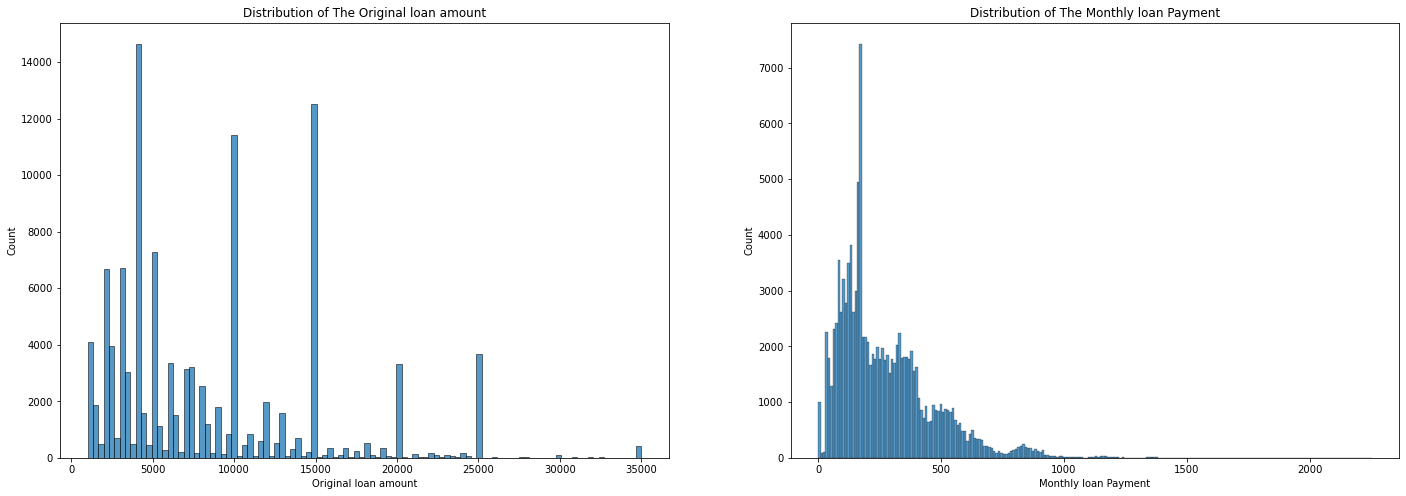

In [5]:
fig, ax = plt.subplots(1, 2, figsize = (24,8))
sns.histplot(df["MonthlyLoanPayment"], ax = ax[1])
sns.histplot(df["LoanOriginalAmount"], ax = ax[0])
ax[1].set_title("Distribution of The Monthly loan Payment")
ax[1].set_xlabel("Monthly loan Payment")
ax[0].set_title("Distribution of The Original loan amount")
ax[0].set_xlabel("Original loan amount")
plt.show()

# making a plot that shows the distribution of The MonthlyLoanPayment of the loan

## Loan Term by Loan Status

1 year loans are good for business, but they only account for 1.42% of the loan listing. They have a whooping 94% completion rate. The Chargedoff 1 year loans have low stated monthly income. Only 66.8% of the 3 year loans were completed. Not high enough. 21.2% and 9.4% of the 3 year loans were Chargedoff and defaulted respectively. Now that's bad for business. but it doesn't just end there. 5 year loans are just as bad or worse. With a completion rate of only 55.3%. 24.8% and 15.6% of these loans are charged off and Past due resepctively. 4.3% of the loans are also defaulted. Is there something responsible for thes. Is there someting the can be done to turn this over?

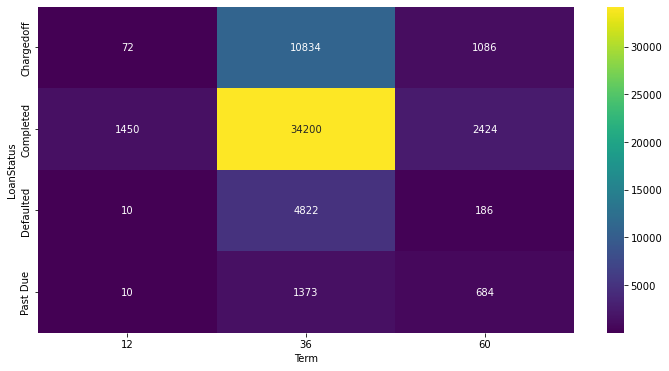

In [6]:
# Excluding loans that are Current, Cancelled, and are FinalPaymentInProgress
df_filtered_1= df.query("LoanStatus == 'Completed' or LoanStatus == 'Past Due' or LoanStatus == 'Defaulted' or LoanStatus == 'Chargedoff'")

# making a plot that shows the number of loan listings for the different loan terms for each of the diffrent loan status

fig, ax = plt.subplots(figsize = (12,6))
ax = sns.heatmap(pd.crosstab(df_filtered_1.LoanStatus, df_filtered_1.Term), cmap="viridis", annot=True, fmt="g")
plt.show()

## Employment Status by Loan Status

- Self-Employed has the highest Chargedoff loans (29.51%), followed by Full-time (21.34%). 
- Loans with a Borrower Employment status of "Not Available", which accounts for accounts for 9.74% of the loan listings (excluding current, cancelled and FinalPaymentInProgress loans), had the least completion loans (57.6%), with 22.5% defaulted loans and 19.9& of Chargedoff loans. Other, Retired
- Not employed, whilst accounting for a small percetage of the loan listings, have High chargedoff and defaulted loans. 
- With Other and Not Employed having over 32% chargedoff loans, and other having 13% Defaulted loans. Past time, Full time and Self employed have the highest number of completed loans.

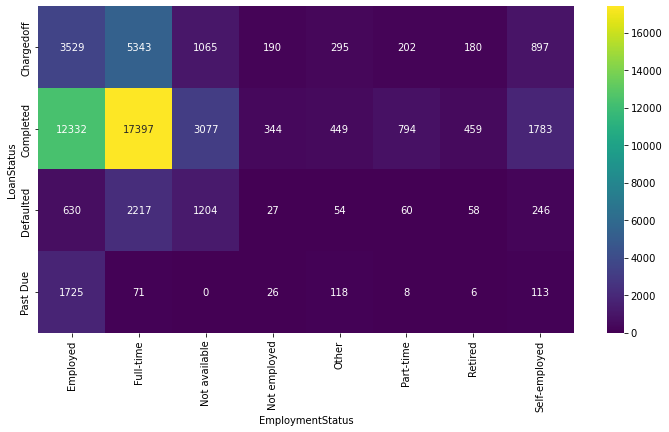

<Figure size 432x288 with 0 Axes>

In [7]:
fig, ax = plt.subplots(figsize = (12,6))
ax = sns.heatmap(pd.crosstab(df_filtered_1.LoanStatus, df_filtered_1.EmploymentStatus), cmap="viridis", annot=True, fmt="g")
plt.xticks(rotation=90)
plt.show()
plt.clf()

## Loan Original Amount and Monthly Loan Payment by Loan Status


Defaulted Loans and Past due loans had relatively lower StatedMonthlyIncome and a higher DebtToIncomeRatio and compromised majorly of 3 year loans. Completed Loans have a lower DebtToIncomeRatio and higher StatedMonthlyIncome. Defaulted and charged off loans have lower stated monthly income and relatively a larger pecentage of low Loan original amount as opposed to Completed and Current loans



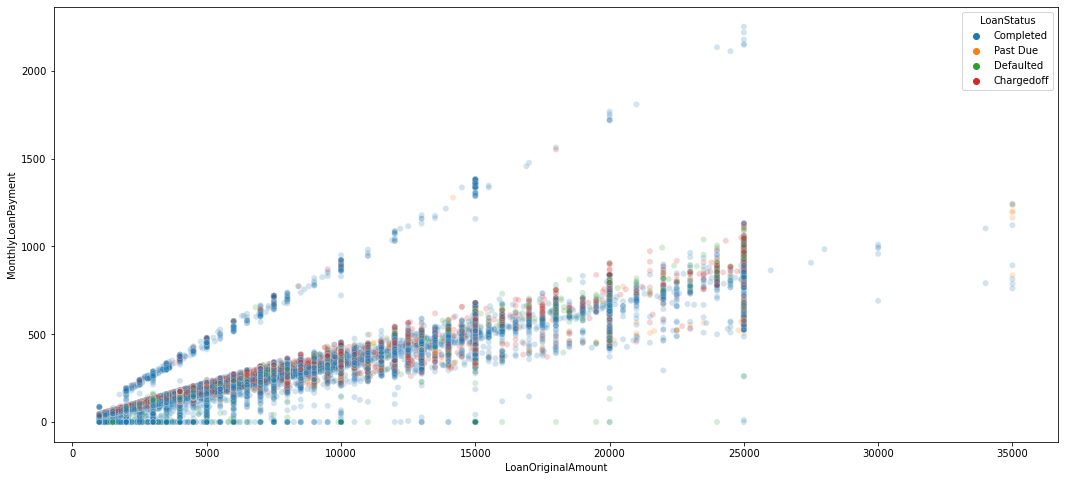

In [8]:
fig,ax = plt.subplots(figsize = (18,8))
sns.scatterplot(data=df_filtered_1, x="LoanOriginalAmount", y="MonthlyLoanPayment",alpha=0.2, hue="LoanStatus", ax =ax)
plt.show()

In [ ]:
!jupyter nbconvert Part_II.ipynb --to slides --post serve --no-input --no-prompt